# Validating Selfplay Data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from aegomoku.gomoku_board import GomokuBoard
from aegomoku.game_data import read_training_data
from aegomoku.utils import analyse_example

import os

from setup_local import DATA_PATH

# The Data

In [3]:
PHASE = '0'
HOST = os.uname()[1]
SELFPLAY_DATA=DATA_PATH / 'selfplay' / '0'
print(os.listdir(SELFPLAY_DATA))

['00011.pickle', '00003.pickle', '00001.pickle', '00009.pickle', '00005.pickle', '00007.pickle', '00010.pickle', '00002.pickle', '00012.pickle', '00008.pickle', '00004.pickle', '00006.pickle']


In [4]:
a_pickle = SELFPLAY_DATA / '00008.pickle'
filename = a_pickle.resolve().as_posix()
filename

'/Users/wgiersche/workspace/Project-Ellie/DeepGomoku/DATA/selfplay/0/00008.pickle'

In [5]:
examples, games = read_training_data(filename)
len(games), len(examples), len(examples[0]), examples[0][0].shape

(40, 13992, 3, (21, 21, 3))

#### Game Info
Player name from `gameplay_params.yaml` and all moves

In [6]:
BOARD_SIZE = 19
board = GomokuBoard(BOARD_SIZE)
for game in games[:4]:
    print(f"{game[0]} begins with black")
    print([board.Stone(i) for i in game[1]])

P400_1.5 begins with black
[K11, H10, I8, J9, I9, I10, J10, H8, H11, I11, M13, L12, J12, I13, I12, G10, H12, F10, E10, G12, I7, J13, H13, G14, H15, H14, G13, F14, I14, E14, D14, F13, D15, F12, F11, F15, F16, G16, D13, D12, D17, D16, G17, E11, G9, H17, E15, C13, H18]
P200_1.0 begins with black
[L10, H8, H10, J11, K10, J10, J12, K11, I9, I11, H11, H12, K9, M11, L11, J9, J8, G11, H6, I7, K7, L6, K6, K8, L12, L9, J6, I6, J7, I5, I8, L5, J5, J4, L7, I4, N9, I3]
P400_1.5 begins with black
[I9, H8, H12, K12, H9, G9, I7, I8, J8, K9, H10, K7, G11, F12, H13, H11, F10, E9, J14, I13, I10, G10, K10, I12, L10, J10, J13, G8, J12, F9, E8, G6, G7, H7, J15, J11, J16]
P200_1.0 begins with black
[J8, L8, K10, J10, K9, K11, I9, K7, M9, L9, L10, I7, M11, N12, M13, M10, J7, J6, G9, H4, I5, J9, L5, K5, L4, K6, K4, M6, L6, L7, K8, I4, J5, G4, J4, H6, I6, H7, H5, F5, I8, H8, H9, O4, M4, N4, F9, E9, L2, L3, K3, M1, G10, F11, G7, G8, D7, E8, D8, E7, E10, E6, E5, I2, H3, E4, F4, D6, F6, N5, N6, P3]


In [7]:
ints = games[0][1]
print(ints)

[162, 178, 217, 199, 198, 179, 180, 216, 159, 160, 126, 144, 142, 122, 141, 177, 140, 176, 175, 139, 236, 123, 121, 101, 83, 102, 120, 100, 103, 99, 98, 119, 79, 138, 157, 81, 62, 63, 117, 136, 41, 60, 44, 156, 196, 45, 80, 116, 26]


Metal device set to: Apple M1 Max


2022-10-22 12:46:39.333971: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-22 12:46:39.334090: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


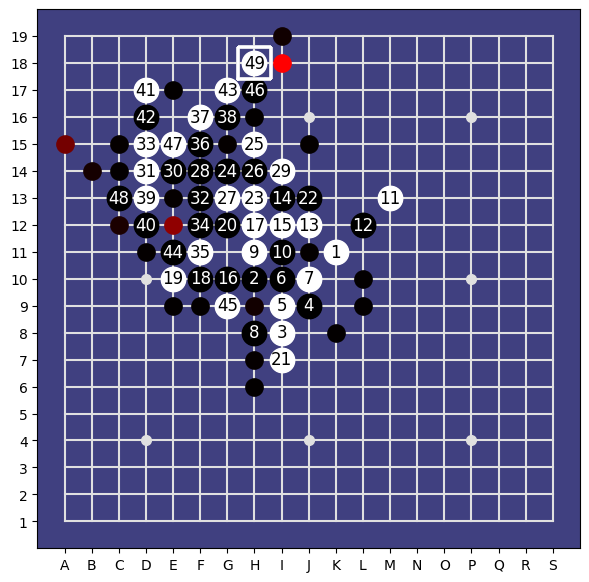

In [8]:
from aegomoku.utils import analyse_board
from aegomoku.policies.topological_value import TopologicalValuePolicy

policy = TopologicalValuePolicy(kappa_s=6, kappa_d=5, board_size=19)

analyse_board(19, ints, adviser_or_array=policy, disp_width=7)

In [9]:
stones = [board.Stone(i) for i in ints]
stones = "".join([str(stone) for stone in stones])
stones

'K11H10I8J9I9I10J10H8H11I11M13L12J12I13I12G10H12F10E10G12I7J13H13G14H15H14G13F14I14E14D14F13D15F12F11F15F16G16D13D12D17D16G17E11G9H17E15C13H18'

# Study the position on an interactive board

In [15]:
from cmclient.api.basics import CompManConfig
from cmclient.api.study import StudyHandler
from aegomoku.gomoku_game import ConstantBoardInitializer

config = CompManConfig(board_size=19)
initializer = ConstantBoardInitializer(stones)
ai = DATA_PATH / 'models'/'3_c2.model'
num_simulations = 200
StudyHandler(config, "../cmclient/gui/", initializer, ai, num_simu=num_simulations).handle()

pygame 2.1.2 (SDL 2.0.18, Python 3.10.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


---

## Data Verification
Now we skim through a good chunk of training records to check whether it makes sense to the expected degree.

### Compare with the original policy's estimate
The tree search results in less, but more refined options

8977
Next to play: WHITE
Value from WHITE's point of view: -0.2601643972083304
Next to play: WHITE
Value from WHITE's point of view: -0.03785005584359169


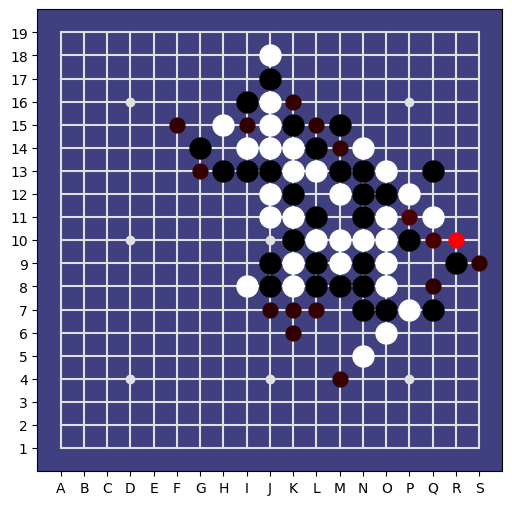

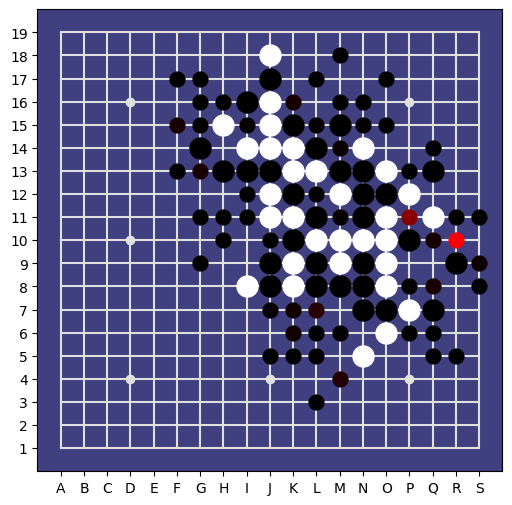

In [15]:
import random
from aegomoku.policies.topological_value import TopologicalValuePolicy

n = random.randint(0, len(examples))
#n = 4688
print(n)
example = examples[n]
analyse_example(example, policy_cutoff=1, disp_width=6)

policy = TopologicalValuePolicy(kappa_s=6, kappa_d=5, board_size=BOARD_SIZE)
s, _, _ = example
p, v = policy.evaluate(s)
analyse_example((s, p, v), policy_cutoff=1, disp_width=6)